<a href="https://colab.research.google.com/github/Ronaldoaleoni/NLP/blob/main/GitNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARY**

In [ ]:
import pandas as pd
import nltk
import PyPDF2
from PyPDF2 import PdfReader
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import glob
import os
import sys
from gensim.models.coherencemodel import CoherenceModel


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**DATA CLEANING**

In [ ]:
#Extracting text from pdf
dir_to_read = '/content/artigo1'
pdf_files = glob.glob(os.path.join(dir_to_read,'*.pdf'))

count = 0
extractedtext = ""
for pdf_file in pdf_files:
    print(pdf_file)
    pdfFileObj = open(pdf_file,'rb')
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    num_pages = len(pdfReader.pages)

    print(num_pages)

    while count < num_pages:
        pageObj = pdfReader.pages[count]
        count +=1
        extractedtext += pageObj.extract_text()
    print(extractedtext)

In [ ]:
#paper body
body = re.compile(r'Introduction.*References', re.DOTALL)
body1 = re.search(body, extractedtext)
body2 = body1[0]

#removing
#lowercasing
min = body2.lower()

#less than two characters
padrão = re.compile(r'\b\w{1,3}(?=\s|$)\s*')
check = padrão.findall(min)
cleaning = re.sub(padrão, "", min)

#citations
padrão1 = re.compile(r'\([^()]*\)')
check1 = padrão1.findall(min)
cleaning1 = re.sub(padrão1, "", cleaning)

#urls
padrão2 = re.compile(r'http[s]?://\S+')
check2 = padrão2.findall(cleaning1)
cleaning2 = re.sub(padrão2, "", cleaning1)

#emails
padrão3 = re.compile(r'\S*@\S*\s?')
check3 = padrão3.findall(cleaning2)
cleaning3 = re.sub(padrão3, "", cleaning2)

print(cleaning3)

TypeError: ignored

In [ ]:
#transforming pdf to txt
text_file = open("merged update.txt", "wt")
n = text_file.write(cleaning3)
text_file.close()

In [ ]:
#read the txt file merged articles
with open ('merged update.txt', 'r') as arquivo:
  text = arquivo.read()

In [ ]:
#removing et al
padrão3 = re.compile(r'al\...')
check3 = padrão3.findall(text)
text1 = re.sub(padrão3, "", text)

#removing authors names
padrão4 = re.compile(r'courtenay')
check4 = padrão4.findall(text1)
text2 = re.sub(padrão4, "", text1)

padrão5 = re.compile(r'domínguez-rodrigo')
check5 = padrão5.findall(text1)
text3 = re.sub(padrão5, "", text2)

padrão6 = re.compile(r'rodrigo')
check6 = padrão6.findall(text3)
text = re.sub(padrão6, "", text3)


In [ ]:
#noise words
padrão7 = re.compile(r'used')
check7 = padrão6.findall(text)
text1 = re.sub(padrão7, "", text)

padrão8 = re.compile(r'using')
check8 = padrão6.findall(text1)
text2 = re.sub(padrão8, "", text1)

padrão9 = re.compile(r'study')
check9 = padrão6.findall(text2)
text3 = re.sub(padrão9, "", text2)

padrão10 = re.compile(r'according')
check10 = padrão6.findall(text3)
text4 = re.sub(padrão10, "", text3)

padrão11 = re.compile(r'result')
check11 = padrão6.findall(text4)
text = re.sub(padrão11, "", text4)


In [ ]:
text = pd.read_csv('')

FileNotFoundError: ignored

**DATA CLEANING 2**

In [ ]:
#tokenization
nltk.tokenize.word_tokenize(text)

['fossil',
 'vertebrate',
 'assemblages',
 'from',
 'archaeological',
 'sites',
 'pose',
 'interpretive',
 'challenge',
 'modern-researchers',
 '.',
 'humans',
 ',',
 'carnivores',
 ',',
 'rodents',
 ',',
 'water',
 'courses',
 ',',
 'geochemical',
 'solutions',
 ',',
 'rock-falls',
 'just',
 'some',
 'agents',
 'processes',
 'that',
 'could',
 'produce',
 'alter',
 'osteological',
 'accumulation',
 '.',
 'discriminat',
 '-',
 'between',
 'products',
 'derived',
 'from',
 'human',
 'behaviour',
 ',',
 'those',
 'produced',
 'physical',
 ',',
 'chemical',
 ',',
 'geological',
 ',',
 'biological',
 'processes',
 ',',
 'first',
 'step',
 'tackling',
 'archaeological',
 '.',
 'taphonomy',
 ',',
 'discipline',
 'that',
 'addresses',
 'origin',
 'history',
 'accumulations',
 'from',
 'perspective',
 'site',
 'formation',
 ',',
 'provides',
 'essential',
 'multi-',
 'trans-disciplinary',
 'framework',
 'making',
 'accurate',
 'interpretations1',
 '.',
 'definition',
 'taphonomy',
 'first',
 '

In [ ]:
#stopwords remotion
stopwords = nltk.corpus.stopwords.words('english')
text_new = "".join([i for i in text if i not in string.punctuation])
print(text_new)
words = nltk.tokenize.word_tokenize(text_new)
print(words)
words_new = [i for i in words if i not in stopwords]
print(words_new)

fossil vertebrate assemblages from archaeological sites pose interpretive challenge modernresearchers humans carnivores rodents water courses geochemical solutions rockfalls just 
some agents processes that could produce alter osteological accumulation discriminat 
between products derived from human behaviour those produced physical chemical geological biological processes first step tackling archaeological  taphonomy discipline that addresses 
origin history accumulations from perspective site formation provides essential multi transdisciplinary framework making accurate  interpretations1
definition taphonomy first established efremov2  living organisms’ transition 
from biosphere lithosphere—that is  processes affecting transition past living 
organisms’ remains  lithosphere observed prehistoric sites however this 
conceptual subsystem palaeontology only applicable prehistoric times cover broader time 
range when more recent historical accounts examined  taphonomy however really eme

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#lematization
wn = nltk.WordNetLemmatizer()
wa = [wn.lemmatize(word) for word in words_new]
print(wa)

['fossil', 'vertebrate', 'assemblage', 'archaeological', 'site', 'pose', 'interpretive', 'challenge', 'modernresearchers', 'human', 'carnivore', 'rodent', 'water', 'course', 'geochemical', 'solution', 'rockfalls', 'agent', 'process', 'could', 'produce', 'alter', 'osteological', 'accumulation', 'discriminat', 'product', 'derived', 'human', 'behaviour', 'produced', 'physical', 'chemical', 'geological', 'biological', 'process', 'first', 'step', 'tackling', 'archaeological', 'taphonomy', 'discipline', 'address', 'origin', 'history', 'accumulation', 'perspective', 'site', 'formation', 'provides', 'essential', 'multi', 'transdisciplinary', 'framework', 'making', 'accurate', 'interpretations1', 'definition', 'taphonomy', 'first', 'established', 'efremov2', 'living', 'organism', '’', 'transition', 'biosphere', 'lithosphere—that', 'process', 'affecting', 'transition', 'past', 'living', 'organism', '’', 'remains', 'lithosphere', 'observed', 'prehistoric', 'site', 'however', 'conceptual', 'subsys

**DATA ANALYSIS**

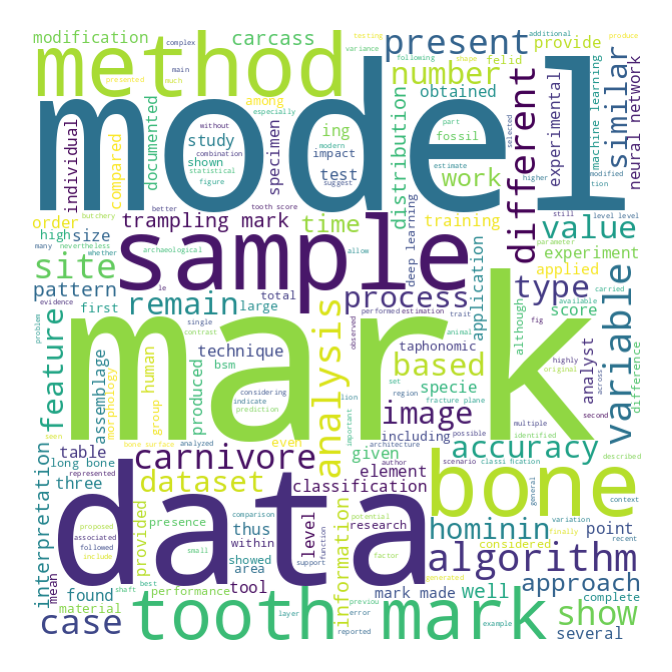

In [ ]:
#exploratory analysis

my_dpi = 300
plt.subplots(figsize = (612.28346457/my_dpi,612.28346457/my_dpi), dpi = my_dpi)

wordcloud = WordCloud (
                    background_color = 'white',
                    width=612, height=612
                        ).generate(' '.join(wa))

plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.tight_layout(pad=0)
plt.savefig('fig.png', dpi=my_dpi)
plt.show()


**LDA**

In [ ]:
df = pd.read_csv('for_real.csv', encoding = 'utf-8')
display(df)

# Remove the columns
df1 = df.loc[:, ['Corpus']]


,Título,Autores,Abstract,Link,Ano,Citações,Affiliations,Correspondence Address,Database,Corpus
0,Reassessing the role of carnivores in the form...,"Vegara-Riquelme M., Gidna A., Uribelarrea del ...","FLK North (FLK N) (Bed I, Olduvai Gorge, Tanza...",Elsevier Ltd,2023,0,"University of Alcalá, Department of History an...",Spain,Scopus,introduction \nmultiple studies have been carr...
1,A case of hominin scavenging 1.84 million year...,"Manuel Domínguez-Rodrigo, Lloyd A Courtenay, L...",Meat eating is one of the hallmarks of human e...,John Wiley and Sons Inc,2022,2,"Institute of Evolution in Africa (IDEA), Alcal...",Spain,Scopus,introduction\nmeat-eating arguably triggers ho...
2,Determining the diagenetic paths of archaeofau...,"Pizarro-Monzo M., Organista E., Cobo-Sánchez L...",The implementation of deep-learning methods to...,John Wiley and Sons Ltd,2022,1,"Institute of Evolution in Africa (IDEA), Unive...",Spain,Scopus,introduction\nascertaining early oldowan site ...
3,"Taphonomic analysis of Batallones-10, a Late M...","Martín-Perea D.M., Morales J., Cantero E., Cou...",The Late Miocene Batallones-10 site (Madrid Ba...,Elsevier B.V.,2021,1,"Palaeobiology Department, National Natural Sci...",Spain,Scopus,introduction \nbatallones-nine palaeontologica...
4,Deep learning improves taphonomic resolution: ...,"Jiménez-García B., Aznarte J., Abellán N., Baq...",Taphonomists have long struggled with identify...,Royal Society Publishing,2020,11,"Institute of Evolution in Africa (IDEA), Unive...",Spain,Scopus,introduction\ntaphonomic research bone surface...
5,Deep learning and taphonomy: high accuracy in ...,"Cifuentes-Alcobendas G., Domínguez-Rodrigo M.",Accurate identification of bone surface modifi...,Nature Research,2019,28,"IDEA (Institute of Evolution in Africa), Unive...",Spain,Scopus,enormous.\ndeep learning most advanced branch...
6,Combining machine learning algorithms and geom...,"Courtenay L.A., Yravedra J., Huguet R., Aramen...",Since the 1980s an intense scientific debate h...,Elsevier B.V.,2019,35,"Àrea de Prehistòria, Universitat Rovira i Virg...",Spain,Scopus,introduction fundamental line research human ...
7,When felids and hominins ruled at Olduvai Gorg...,"Arriaza M.C., Domínguez-Rodrigo M.","In the past twenty years, skeletal part profil...",Elsevier Ltd,2016,30,"Departamento de Geología, Geografía y Medio Am...",Spain,Scopus,introduction\nearliest interpretations discret...
8,Application of artificial intelligence and mac...,"R Sharma, AR Bhute, BK Bastia - Forensic Scien...",… The following keywords were used either alon...,Elsevier Ltd,2022,4,Department of Forensic Medicine and Toxicology...,India,Google,time passed since death. forensic investigatio...
9,Artificial intelligence approach to palaeogeog...,"A Sohrabi, A Kadkhodaie… - Palaeogeography …, ...",… The current study proposes the first report ...,Elsevier Ltd,2021,3,"Department of Earth Sciences, Faculty of Natur...",Iran,Google,"introduction \norder rhynchonellida, living or..."


In [ ]:
# Remove punctuation

df1['Corpus'].head()

0    introduction \nmultiple studies have been carr...
1    introduction\nmeat-eating arguably triggers ho...
2    introduction\nascertaining early oldowan site ...
3    introduction \nbatallones-nine palaeontologica...
4    introduction\ntaphonomic research bone surface...
Name: Corpus, dtype: object

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu','also', 'al', 'use','used', 'using', 'study', 'introduction', 'references', 'methods', 'results', 'discussion', 'acknowledgments', 'author contributions', 'supporting information'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = df1.Corpus.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['multiple', 'studies', 'carried', 'reconstruct', 'behavior', 'early', 'pleistocene', 'hominins', 'olduvai', 'gorge', 'understand', 'carnivore', 'hominin', 'interactions', 'sites', 'several', 'sites', 'hominins', 'main', 'taphonomic', 'agent', 'responsible', 'accumulation', 'modification', 'archaeofaunal', 'assemblages', 'zinj', 'hominins', 'early', 'corresponding']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 6), (5, 1), (6, 2), (7, 1), (8, 3), (9, 9), (10, 1), (11, 1), (12, 5), (13, 2), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 2), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 30
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(12,
  '0.012*"marks" + 0.007*"tooth" + 0.006*"model" + 0.006*"models" + '
  '0.005*"accuracy" + 0.005*"sample" + 0.004*"bone" + 0.004*"data" + '
  '0.004*"mark" + 0.004*"bones"'),
 (9,
  '0.014*"marks" + 0.005*"mark" + 0.005*"accuracy" + 0.005*"bone" + '
  '0.004*"tooth" + 0.004*"models" + 0.004*"bones" + 0.004*"data" + '
  '0.003*"sample" + 0.003*"model"'),
 (15,
  '0.008*"tooth" + 0.006*"marks" + 0.005*"bone" + 0.005*"models" + '
  '0.005*"data" + 0.004*"carnivore" + 0.004*"accuracy" + '
  '0.004*"classification" + 0.004*"analysis" + 0.004*"model"'),
 (20,
  '0.011*"marks" + 0.006*"sample" + 0.006*"models" + 0.006*"data" + '
  '0.005*"tooth" + 0.005*"model" + 0.005*"analysis" + 0.004*"accuracy" + '
  '0.004*"bones" + 0.004*"classification"'),
 (1,
  '0.014*"marks" + 0.008*"model" + 0.007*"models" + 0.006*"tooth" + '
  '0.006*"data" + 0.005*"mark" + 0.005*"bone" + 0.004*"sample" + '
  '0.004*"analysis" + 0.003*"accuracy"'),
 (14,
  '0.010*"marks" + 0.008*"tooth" + 0.006*"bone" + 0.0

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 

In [ ]:
#import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/sample_data'+str(num_topics))
#
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/sample_data'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BrokenProcessPool: ignored

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nCoherence Score:  -0.29005852263177684


In [ ]:
!pip instal downloadSvg

ERROR: unknown command "instal" - maybe you meant "install"


In [ ]:
#visualize on webrowser
import downloadSvg from 'svg-crowbar'

downloadSvg(document.querySelector('svg'));

SyntaxError: ignored